# SC2001 LAB PROJECT 2

### Greedy Algorithm
Dijkstra algorithm uses greedy algorithm. They are called “greedy” because these algorithms only use the knowledge available at the time, to make the best option, in hopes of reaching the optimal solution. It is simple and efficient, often used in optimization problems like shortest paths or minimum spanning trees. However, it doesn't always guarantee the best overall solution, as it may miss better options by focusing only on immediate benefits.

### Dijkstra Algorithm, what is it, and how it work
Dijkstra algorithm is an algorithm to find the shortest path from a single source vertext to all other vertices in a weighted, directed graph. All weights must be non-negative.

It works by maintaining a set of visited vertices and assigning them the shortest known distance from the source. Initially, all distances are set to infinity, except for the source vertex, which has a distance of 0. At each step, the algorithm selects the unvisited vertex with the smallest known distance, updates the distances of its neighbors, and marks it as visited. This process repeats until all vertices are visited, resulting in the shortest path to each vertex.

# (a) Dijkstra's algorithm with an adjacency matrix and an array-based priority queue. 

## Theoretical Time Complexity for using adjacency matrix, and an array-based priority queue

#### 1. Initialisation:
- We initialise an array *dist* to keep track of the shortest distance to each vertex. This takes $O(|V|)$ time.

#### 2. Extracting the Minimum:
- At each iteration, we need to find the unvisited vertex with the smallest distance. Since we are using an array to simulate the priority queue, finding the minimum vertex takes $O(|V|)$ time.
- There are $|V|$ vertices, so this step is repeated $|V|$ times, giving a total time complexity of $O(|V|^2)$ for this part of the algorithm.

#### 3. Relaxation:
- For each vertex, we look at all other vertices to see if we need to update their distances (i.e., relaxation step). This involves iterating through the row corresponding to the current vertex in the adjacency matrix.
- Each relaxation step takes $O(|V|)$ time because the adjacency matrix has $|V|$ entries per row, and we perform this for every vertex in the graph.
- In total, the relaxation step takes $O(|V|^2) times.

Combining both the **extract minimum** and **relaxation** steps:
- **Extract minimum**: $O(|V|^2)$
- **Relaxation**: $O(|V|^2)$

#### Hence, the total time complexity should be equal to: 
#### $O(|V|^2)$

## Empirical Analysis for using adjacency matrix, and an array-based priority queue

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(5)

def generate_random_graph_matrix(n, graph_type='dense'):
    if graph_type == 'dense':
        graph = np.random.randint(1, 10, size=(n, n))
        graph = np.tril(graph) + np.tril(graph, -1).T
    elif graph_type == 'average':
        graph = np.zeros((n, n), dtype=int)
        edges = random.sample([(i, j) for i in range(n) for j in range(i+1, n)], k=n*3)  # Average with 3n edges
        for u, v in edges:
            weight = random.randint(1, 10)
            graph[u][v] = weight
            graph[v][u] = weight
    else:
        graph = np.zeros((n, n), dtype=int)
        edges = random.sample([(i, j) for i in range(n) for j in range(i+1, n)], k=n*2)  # Sparse with 2n edges
        for u, v in edges:
            weight = random.randint(1, 10)
            graph[u][v] = weight
            graph[v][u] = weight
    np.fill_diagonal(graph, 0)
    return graph

def min_distance(d, S, V):
    minDist = float('inf')
    minVertex = 0

    for v in range(V):
        if d[v] < minDist and S[v] == False:
            minDist = d[v]
            minVertex = v

    return minVertex

def dijkstra_matrix(adjMatrix, source, V):
    d = [float('inf')] * V
    S = [False] * V
    d[source] = 0
    for _ in range(V-1):
        u = min_distance(d, S, V)
        S[u] = True
        for v in range(V):
            if adjMatrix[u][v] > 0 and not S[v] and d[v] > d[u] + adjMatrix[u][v]:
                d[v] = d[u] + adjMatrix[u][v]
    return d

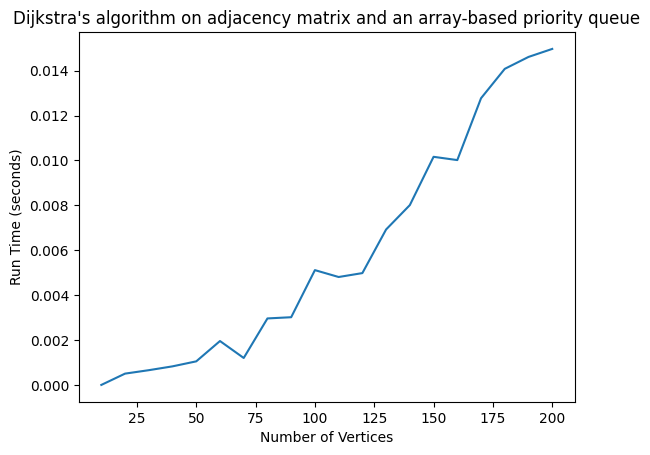

In [3]:
numVertices = range(10, 210, 10)
numRepetition = 10
runTimeArr = []

for n in numVertices:
    graph = generate_random_graph_matrix(n, graph_type="average")

    start = time.time()

    for _ in range(numRepetition):
        source = np.random.randint(0, n, size=2)
        dijkstra_matrix(graph, source=0, V=n)

    end = time.time()
    aveTime = (end - start) / numRepetition
    runTimeArr.append(aveTime)

plt.plot(numVertices, runTimeArr)
plt.xlabel("Number of Vertices")
plt.ylabel("Run Time (seconds)")
plt.title("Dijkstra\'s algorithm on adjacency matrix and an array-based priority queue")
plt.show()

# (B) DIJKSTRA'S ALGO USING MINIMIZING HEAP FOR PRIORITY QUEUE

In [4]:
import heapq;

def dijkstra_list(graph, source):

    d = {}
    pi = {}
    S = {}

    for v in graph:
        d[v] = float('inf')
        pi[v] = None
        S[v] = 0

    d[source] = 0

    p_queue = [(d[v], v) for v in graph]

    heapq.heapify(p_queue)

    while p_queue:

        cur_d, u = heapq.heappop(p_queue)

        if S[u] == 1:
            continue

        S[u] = 1

        for v, w in graph[u]:
            if S[v] == 0:
                new_d = cur_d + w
                if new_d < d[v]:
                    d[v] = new_d
                    pi[v] = u
                    heapq.heappush(p_queue, (new_d, v))

    return d, pi

## Theoretical Time Complexity for Minimizing Heap for Priority Queue

The input graph $G = (V, E)$ we're considering has $|V|$ number of vertices and $|E|$ number of edges.

To analyse theoretical time complexity, we take into account a few things.

#### 1. To enqueue the vertices: $ O (|V|) $
Dijkstra's algorithm maintains a priority queue using the minimzing heap to store and retrieve the vertex with the smallest distance value. Hence, to enqueue all the vertices, it takes $O(|V|)$ time. 

#### 2. To extract the minimum vertex from the heap: $ O (|V| * log|V|) $
We know that the vertex with the smallest distance is placed on top of the heap. Once the element is extracted, the minimising order of the heap has to be restored. For this, the heap has to be traversed to check if the parent nodes are smaller than the children and switching them if not. 

This time complexity is equivalent to the height of the binary tree: $O (log(|V|)) $

Combining this with the number of vertices $|V|$, we have : $O(V * log(|V|))$

#### 3. Relaxing the edges, i.e., updating the shortest distance to a vertex: $O (|E| * log|V|)$
When a shorter distance to a vertex is found, the priority of the vertex has to be updated in the priority queue. This involves the Decrease-key operation, which involves updating the vertex node in the tree and then restoring the minimising heap property. 

This is same as before and is equivalent to: $O (log(|V|)) $

Since this is done once for each of the edges in the heap, we then have $O (|E| * log|V|)$

#### Hence, the total time complexity should be equal to: 
#### $O((|V| * log|V|) + (|E| * log|V|)) = O((|V|+|E|) * log |V|) $

## Empirical Analysis of Time Complexity for Dijsktra Using Minimizing Heap and Adj List

In [5]:

import random
import time
import matplotlib.pyplot as plt

# to track time
def time_track(graph, start):
    starting = time.time()
    dijkstra_list(graph, start)
    ending = time.time()
    return ending - starting

# to generate and store graph as adj list with vertices, edges and corresponding weight
def generate_random_graph_list(num_vertices, num_edges, max_weight=10):
    graph = {i: [] for i in range(num_vertices)}
    edges_added = 0

    while edges_added < num_edges:
        u = random.randint(0, num_vertices - 1)
        v = random.randint(0, num_vertices - 1)
        if u != v:
            weight = random.randint(1, max_weight)
            graph[u].append((v, weight))
            graph[v].append((u, weight))  
            edges_added += 1

    return graph

# to generate graphs of diff num of vertices and edges
num_trials = 10
num_vertices_list = [100, 200, 500, 1000, 2000]
num_edges_list = [500, 1000, 5000, 10000, 20000]


results = []


for num_vertices in num_vertices_list:
    for num_edges in num_edges_list:
        total_time = 0
        
        for i in range(num_trials):
            
            graph = generate_random_graph_list(num_vertices, num_edges)
            execution_time = time_track(graph, start=0)
            total_time += execution_time
        
        # Average the time over trials
        average_time = total_time / num_trials
        results.append((num_vertices, num_edges, average_time))
        print(f"Vertices: {num_vertices}, Edges: {num_edges}, Avg Time: {average_time:.4f} seconds")


Vertices: 100, Edges: 500, Avg Time: 0.0002 seconds
Vertices: 100, Edges: 1000, Avg Time: 0.0001 seconds
Vertices: 100, Edges: 5000, Avg Time: 0.0012 seconds
Vertices: 100, Edges: 10000, Avg Time: 0.0016 seconds
Vertices: 100, Edges: 20000, Avg Time: 0.0049 seconds
Vertices: 200, Edges: 500, Avg Time: 0.0010 seconds
Vertices: 200, Edges: 1000, Avg Time: 0.0006 seconds
Vertices: 200, Edges: 5000, Avg Time: 0.0012 seconds
Vertices: 200, Edges: 10000, Avg Time: 0.0047 seconds
Vertices: 200, Edges: 20000, Avg Time: 0.0070 seconds
Vertices: 500, Edges: 500, Avg Time: 0.0011 seconds
Vertices: 500, Edges: 1000, Avg Time: 0.0011 seconds
Vertices: 500, Edges: 5000, Avg Time: 0.0029 seconds
Vertices: 500, Edges: 10000, Avg Time: 0.0026 seconds
Vertices: 500, Edges: 20000, Avg Time: 0.0089 seconds
Vertices: 1000, Edges: 500, Avg Time: 0.0008 seconds
Vertices: 1000, Edges: 1000, Avg Time: 0.0011 seconds
Vertices: 1000, Edges: 5000, Avg Time: 0.0028 seconds
Vertices: 1000, Edges: 10000, Avg Time: 0

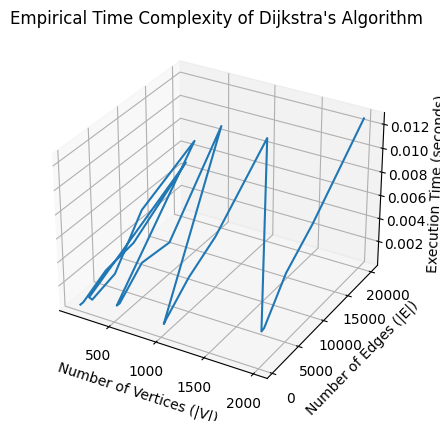

In [6]:

vertices = [result[0] for result in results]
edges = [result[1] for result in results]
times = [result[2] for result in results]

# Creating 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(vertices, edges, times, label = 'parametric curve')

ax.set_xlabel('Number of Vertices (|V|)')
ax.set_ylabel('Number of Edges (|E|)')
ax.set_zlabel('Execution Time (seconds)')
ax.set_title('Empirical Time Complexity of Dijkstra\'s Algorithm')

plt.show()


Since both parameters vary simultaneously, the 3D plot makes it hard to detremine how each componenet contributes to the runtime. So, we need to
- observe the independent impact of vertices on the runtime.
- observe the independent impact of edges on the runtime.

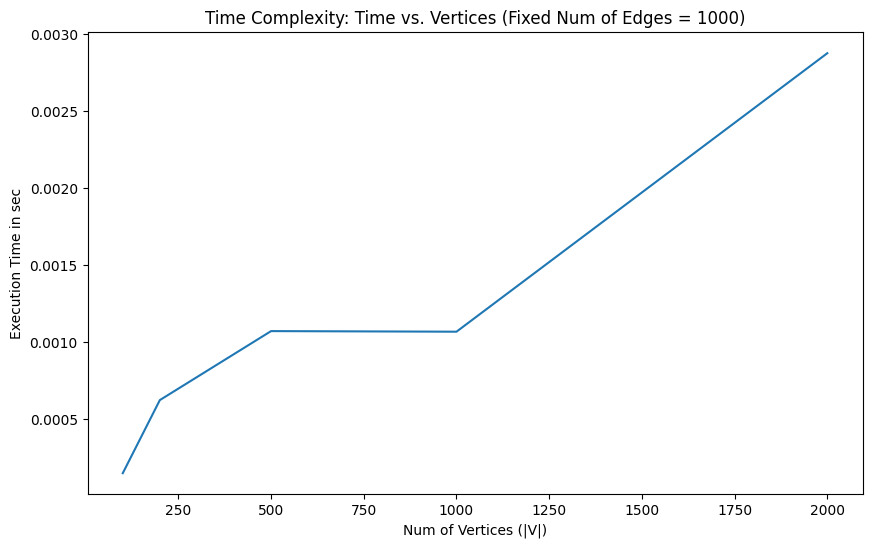

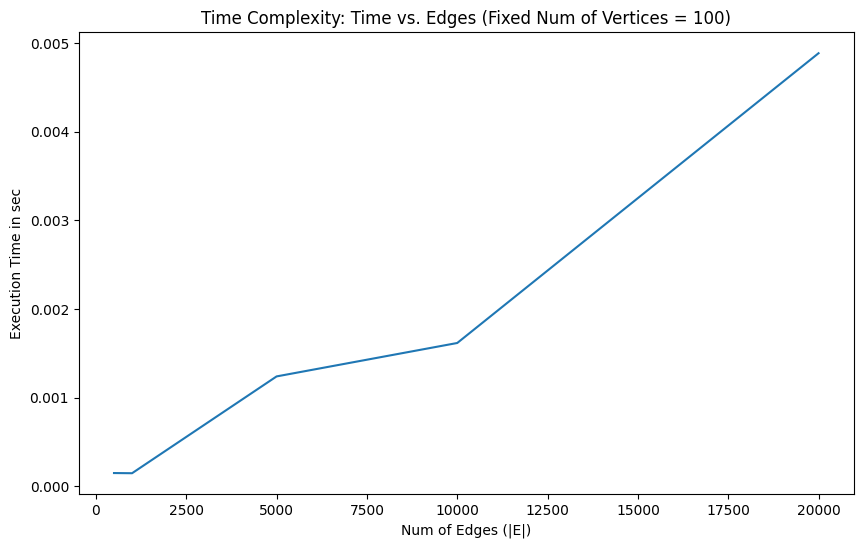

In [7]:

vertices = [result[0] for result in results]
edges = [result[1] for result in results]
times = [result[2] for result in results]

# creating lists to store times
vertices_fixed_edges = {}
edges_fixed_vertices = {}

# fixing the number of edges to 1000 and varying vertices
fixed_edges = 1000
vertices_fixed_edges_times = [time for v, e, time in results if e == fixed_edges]
vertices_fixed_edges_vals = [v for v, e, time in results if e == fixed_edges]

# fixing the number of vertices to 100 and varying edges
fixed_vertices = 100
edges_fixed_vertices_times = [time for v, e, time in results if v == fixed_vertices]
edges_fixed_vertices_vals = [e for v, e, time in results if v == fixed_vertices]

# plot of time vs vertices
plt.figure(figsize=(10, 6))
plt.plot(vertices_fixed_edges_vals, vertices_fixed_edges_times)
plt.title(f'Time Complexity: Time vs. Vertices (Fixed Num of Edges = {fixed_edges})')
plt.xlabel('Num of Vertices (|V|)')
plt.ylabel('Execution Time in sec')
plt.show()

# plot of time vs edges
plt.figure(figsize=(10, 6))
plt.plot(edges_fixed_vertices_vals, edges_fixed_vertices_times)
plt.title(f'Time Complexity: Time vs. Edges (Fixed Num of Vertices = {fixed_vertices})')
plt.xlabel('Num of Edges (|E|)')
plt.ylabel('Execution Time in sec')
plt.show()

From the theoretical time complexity, we saw that both edges and vertices of the graph have to be taken into account. For this, we plot separate graphs
- the execution time vs the number of vertices with a fixed number of edges 
- the execution time vs the number of edges with fixed number of vertices 


#### 1. Time VS. Num of Vertices (Fixed Num of Edges = 1000)
- The number of edges is fixed to focus on how the run time of the Dijsktra's algorithm scales with the number of vertices.
- We see that the graph seems to be a nearly logarithmic plot as the number of vertices, $|V|$ increases.
- This is in alignment with the theoretical analysis we did earlier in which we expected a logarithmic relationship due to the $log|V|$ component in $O((|V|+|E|) * log |V|)$

#### 2. Time VS. Num of Edges (Fixed Num of Vertices = 100)
- Like before, the number of vertices is fixed to focus on how the run time of the Dijsktra's algorithm scales with the number of edges.
- We see that the graph seems to show a nearly linear relationship between run time and edges, as value of $|E|$ increases.
- This is in alignment with the theoretical analysis we did earlier in which we expected a linear relationship.

# (C) Compare the two implementations in (a) and (b). Discuss which implementation is better and in what circumstances

In [8]:
# ---------------- Plotting ---------------- #
def plot_results(num_vertices, matrix_times, list_times, graph_type):
    plt.plot(num_vertices, matrix_times, label="Adjacency Matrix", marker='o')
    plt.plot(num_vertices, list_times, label="Adjacency List", marker='s')
    
    plt.xlabel('Number of Vertices')
    plt.ylabel('Average Runtime (seconds)')
    plt.title(f"Comparison of Dijkstra's Algorithm in {graph_type.capitalize()} Graph")
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
def benchmark(graph_type='dense'):
    num_vertices_list = [50, 100, 150, 500]
    num_trials = 10

    matrix_times = []
    list_times = []

    for num_vertices in num_vertices_list:
        matrix_total_time = 0
        list_total_time = 0
        
        # Determine number of edges based on graph type (sparse, dense, or average)
        if graph_type == 'dense':
            num_edges = num_vertices * (num_vertices - 1) // 4
        else:
            num_edges = num_vertices * 2  # Sparse graph with 2n edges

        # Running multiple trials to average time
        for _ in range(num_trials):
            # Matrix graph (dense/sparse)
            matrix_graph = generate_random_graph_matrix(num_vertices, graph_type=graph_type)
            start = time.time()
            dijkstra_matrix(matrix_graph, source=0, V=num_vertices)
            end = time.time()
            matrix_total_time += (end - start)

            # List graph (dense/sparse)
            list_graph = generate_random_graph_list(num_vertices, num_edges)
            start = time.time()
            dijkstra_list(list_graph, source=0)
            end = time.time()
            list_total_time += (end - start)
        
        # Average time per trial
        matrix_times.append(matrix_total_time / num_trials)
        list_times.append(list_total_time / num_trials)

    return num_vertices_list, matrix_times, list_times

Running benchmark for Dense Graphs...


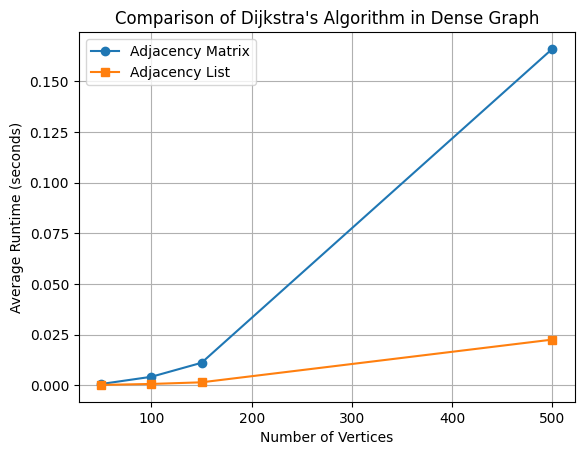

Running benchmark for Sparse Graphs...


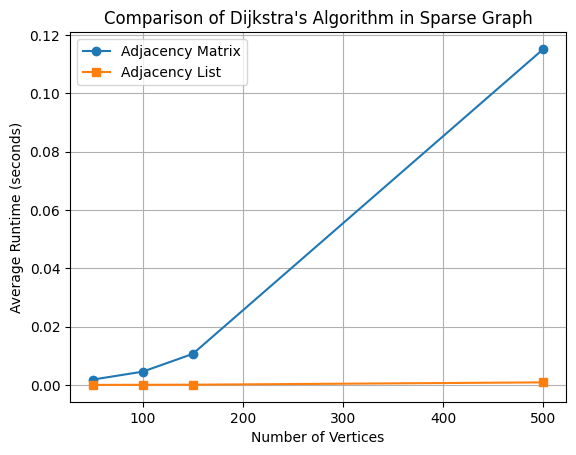

In [10]:

print("Running benchmark for Dense Graphs...")
num_vertices_dense, matrix_times_dense, list_times_dense = benchmark(graph_type='dense')
plot_results(num_vertices_dense, matrix_times_dense, list_times_dense, graph_type='dense')

print("Running benchmark for Sparse Graphs...")
num_vertices_sparse, matrix_times_sparse, list_times_sparse = benchmark(graph_type='sparse')
plot_results(num_vertices_sparse, matrix_times_sparse, list_times_sparse, graph_type='sparse')